In [9]:
library(dplyr)
library(ggplot2)
library(readr)
library(magrittr)

In [10]:
random.metrics <- read_delim('random_conn_all_measures.csv', delim = ',', col_names = TRUE);

# betweennesscentrality=rep(c("top 10%", "bottom 10%"), each=2)
# , 
#                                   times=2)

Warning message:
“Missing column names filled in: 'X1' [1]”Parsed with column specification:
cols(
  X1 = col_integer(),
  random_omega_A = col_double(),
  random_alpha = col_double(),
  random_lambda = col_double(),
  random_selected_divergence = col_double()
)


In [24]:
my.summary<-data.frame(value=c(mean(random.metrics$random_omega_A), 
                               mean(random.metrics$random_alpha)),
                         sd=c(sd(random.metrics$random_omega_A), 
                               sd(random.metrics$random_alpha)),
                         metric=rep(c("omega_A", "alpha"), 
                                  times=2))


In [27]:
my.summary$randomCI <- c(0.17333810057978014,  0.6558058661109955, 0.19092593902418023, 0.6896603913147471)

In [28]:
my.summary

value,sd,metric,randomCI
0.1821320,0.06338511,omega_A,0.1733381
0.6727331,0.12200890,alpha,0.6558059
0.1821320,0.06338511,omega_A,0.1909259
0.6727331,0.12200890,alpha,0.6896604


In [33]:
my.summary<-my.summary[order(my.summary$metric)]

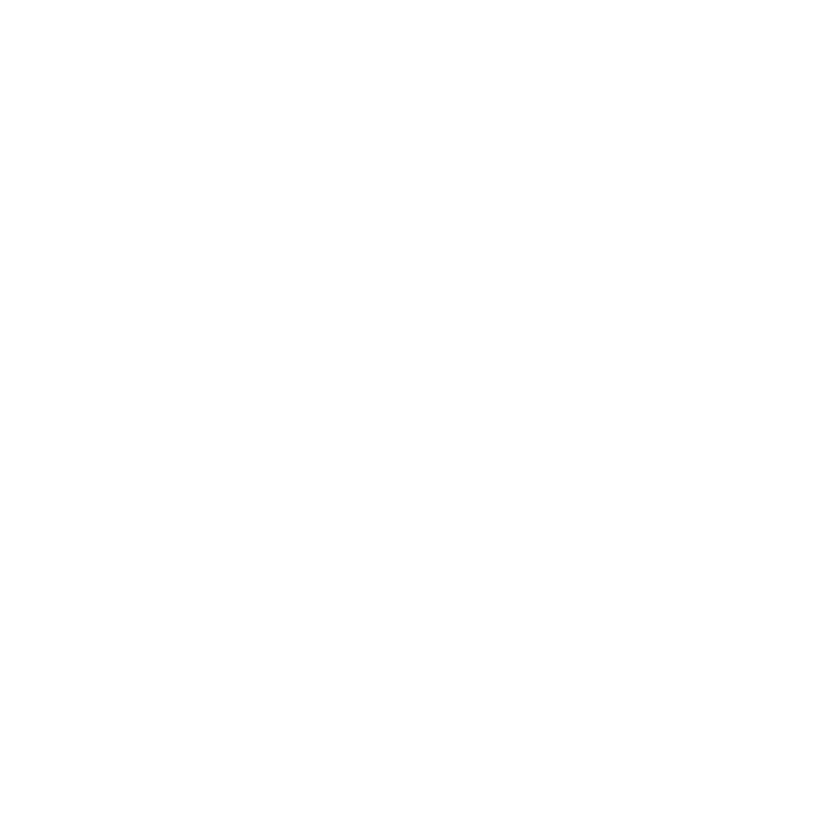

In [37]:
my_font = 'Helvetica'
my.plot<-ggplot(data=my.summary, aes(value)) +
geom_point()  +
facet_grid(metric~., scales = "free_y") +
geom_errorbar(data=my.summary,
              aes(ymin=my.summary$randomCI)) +
theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        panel.border = element_rect(colour="black"), 
        strip.background = element_rect(colour="black", fill="white"),
        axis.text.x=element_text(size=12, family=my_font), axis.title.x=element_text(size=14, family=my_font,vjust=0.01),
        axis.text.y=element_text(size=12, family=my_font), axis.title.y=element_text(size=14, family=my_font))
my.plot

# ggsave(plot=my.plot, "./random_alpha_omega_a_conn.png")

In [ ]:
my_font = 'Helvetica'
my.plot<-ggplot(data=my.summary, aes(betweennesscentrality, value)) +
geom_point()  +
facet_grid(metric~., scales = "free_y") +
geom_errorbar(data=my.summary,
              aes(ymin=my.summary$lowerCI, 
                  ymax=my.summary$upperCI, width=0.2)) +
theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        panel.border = element_rect(colour="black"), 
        strip.background = element_rect(colour="black", fill="white"),
        axis.text.x=element_text(size=12, family=my_font), axis.title.x=element_text(size=14, family=my_font,vjust=0.01),
        axis.text.y=element_text(size=12, family=my_font), axis.title.y=element_text(size=14, family=my_font))
my.plot

ggsave(plot=my.plot, "./random_alpha_omega_a_conn.png")